# How did Twitter react to the Coronavirus pandemic?

In [2]:
import sys
!{sys.executable} -m pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 6.4 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:
      Successfully uninstalled pip-20.0.2


In [1]:
import sys
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install pyLDAvis

In [2]:
import re
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import gensim
import numpy as np
from pprint import pprint
import seaborn as sns
import matplotlib.colors as mcolors

unable to import 'smart_open.gcs', disabling that module


In [3]:
df = pd.read_csv('2020-03-30 Coronavirus Tweets.CSV')

In [4]:
df

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1244414033547030529,1054394794305302528,2020-03-30T00:00:00Z,Ecodiariozac,"#Entérate Gobierno del Estado, a través de sus...",TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,679,991,NaN,2018-10-22T15:31:23Z,False,es
1,1244414034411171845,31023547,2020-03-30T00:00:00Z,Reporte_Indigo,"#PorSiNoLoViste | Si eres un cliente cumplido,...",TweetDeck,NaN,NaN,NaN,False,...,8,NaN,NaN,NaN,898366,621,NaN,2009-04-14T01:47:10Z,True,es
2,1244414033333227523,296096105,2020-03-30T00:00:00Z,tv1_rtm,Pengurusan kes-kes POSITIF COVID-19\n\n#Perint...,TweetDeck,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,38609,534,NaN,2011-05-10T05:57:18Z,False,in
3,1244414034423590913,2963716598,2020-03-30T00:00:00Z,ajplusespanol,"Médico cirujano, doctor en epidemiología y sub...",Twitter Media Studio,NaN,NaN,NaN,False,...,24,NaN,NaN,NaN,114290,668,NaN,2015-01-07T18:44:40Z,True,es
4,1244414033672855552,4856038638,2020-03-30T00:00:00Z,BlogDelRegio,La @NlSalud implementará un protocolo de inves...,TweetDeck,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,6785,1523,NaN,2016-02-03T22:48:13Z,False,es
5,1244414034322976768,1183751622,2020-03-30T00:00:00Z,ISSSTE_mx,Para convivir bien sigue con tu familia estos ...,TweetDeck,NaN,NaN,NaN,False,...,2,NaN,NaN,NaN,137867,196,NaN,2013-02-15T21:02:36Z,True,es
6,1244414033790410752,1163114157891129344,2020-03-30T00:00:00Z,SLMG87URFClcrD1,3月30日にどうやらMCOの強化ﾊﾞｰｰｰｼﾞｮﾝが発表されるとの見込み。詳細は発表時にわか...,Twitter Web App,NaN,NaN,NaN,True,...,0,NaN,NaN,NaN,109,547,NaN,2019-08-18T15:43:30Z,False,ja
7,1244414033672863744,132225222,2020-03-30T00:00:00Z,SSalud_mx,¡#Infórmate! #ConferenciaDePrensa sobre el #Co...,TweetDeck,NaN,NaN,NaN,False,...,105,NaN,NaN,NaN,824473,212,NaN,2010-04-12T16:53:45Z,True,es
8,1244414033467330560,817072420947247104,2020-03-30T00:00:00Z,Tu_IMSS_Coah,Asegura los beneficios que te otorga el #IMSS....,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,1548,170,NaN,2017-01-05T18:17:00Z,False,es
9,1244414034348294148,1239901273002033155,2020-03-30T00:00:00Z,uri_911,#VEN911Oficial | #29Mar En tus manos está la s...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,66,75,NaN,2020-03-17T13:09:13Z,False,es


In [5]:
df_en = df[df.lang == 'en']
df_en

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
10,1244414032964190208,15079924,2020-03-30T00:00:00Z,WFPUSA,#DidYouKnow: @WFP is 100% voluntarily funded: ...,Twitter for Advertisers,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,25816,2797,NaN,2008-06-11T01:05:43Z,True,en
12,1244414035698814977,1925199355,2020-03-30T00:00:00Z,MailMyStatement,"To treat COVID-19, administration expected to ...",eClincher,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,5932,4915,NaN,2013-10-02T01:01:01Z,False,en
13,1244414036038561792,1103013448659566592,2020-03-30T00:00:00Z,Derek_Griffin1,"To treat COVID-19, administration expected to ...",eClincher,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,1302,1159,NaN,2019-03-05T19:24:33Z,False,en
14,1244414035660947456,1968929071,2020-03-30T00:00:00Z,MDOT_BWB,@MichiganDOT will not accept cash transactions...,TweetDeck,NaN,2.054231e+07,MichiganDOT,False,...,1,NaN,NaN,NaN,4422,16,NaN,2013-10-18T13:40:20Z,True,en
15,1244414035396788226,20605323,2020-03-30T00:00:00Z,KTVOTV,Health experts say the risks are very low that...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,9139,987,NaN,2009-02-11T17:37:33Z,True,en
21,1244414034889388032,18635558,2020-03-30T00:00:00Z,NationofJake,"From Executive Producer @TappDaddy, it's Rage ...",TweetDeck,NaN,NaN,NaN,False,...,16,NaN,NaN,NaN,2393,1273,NaN,2009-01-05T16:12:34Z,False,en
23,1244414034847432706,14755165,2020-03-30T00:00:00Z,MSF_canada,"In this hospital, where the first positive swa...",TweetDeck,NaN,NaN,NaN,False,...,5,NaN,NaN,NaN,22981,2287,NaN,2008-05-13T05:29:06Z,True,en
29,1244414034344136708,1161445893666553861,2020-03-30T00:00:00Z,dotLA,ICYMI #CoronaVirusUpdate: \n\n📢 LA officials a...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,2014,86,NaN,2019-08-14T01:14:14Z,False,en
30,1244414034306191360,23107830,2020-03-30T00:00:00Z,JoanReeves,Sew a Face Mask for Family or Hospitals. Detai...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,8983,6672,NaN,2009-03-06T19:40:26Z,False,en
31,1244414034301992961,26227770,2020-03-30T00:00:00Z,stlouispark,Small businesses who want help navigating the ...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,6451,356,NaN,2009-03-24T12:41:43Z,True,en


In [6]:
df_en_random= df_en.sample(n=5000)
df_en_random

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
534979,1244747276750331913,18379569,2020-03-30T22:04:11Z,Layofflist,@GOP’s ‘War on Science’ hurting government’s r...,Twitter Web Client,NaN,1.113425e+07,GOP,False,...,0,NaN,NaN,NaN,3115,2739,NaN,2008-12-25T21:34:00Z,False,en
76794,1244472129698934784,36327407,2020-03-30T03:50:51Z,htTweets,#CoronavirusOutbreak | China unexpectedly cuts...,Twitter Web App,NaN,NaN,NaN,False,...,9,NaN,NaN,NaN,7221894,126,NaN,2009-04-29T10:11:34Z,True,en
245404,1244591347719442434,1025430759165906944,2020-03-30T11:44:35Z,SeeNewsEGY,An American citizen in New York commits suicid...,Twitter for Android,NaN,NaN,NaN,False,...,4,NaN,NaN,NaN,5536,30,NaN,2018-08-03T17:18:39Z,False,en
268958,1244604709228417025,1394922295,2020-03-30T12:37:40Z,LovellAccounts,HMRC have launched a new #Coronavirus Informat...,Twitter for iPhone,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,1626,1474,NaN,2013-05-01T15:34:40Z,False,en
94859,1244488233225818112,1195928051953098752,2020-03-30T04:54:50Z,brihaspati_c,@AndekhaaSach Because infestations like #coron...,Twitter Web App,1.244478e+18,1.124310e+09,AndekhaaSach,False,...,0,NaN,NaN,NaN,5,1,NaN,2019-11-17T04:54:26Z,False,en
135,1244414048017551362,3201530992,2020-03-30T00:00:03Z,nicogoffette,"""Though the human costs of pandemics are dread...",Buffer,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,715,1145,NaN,2015-04-24T15:45:18Z,False,en
342414,1244648241985204231,1283359081,2020-03-30T15:30:39Z,GwenGraham,Another link to compiled #coronavirus informat...,Twitter for iPad,1.244646e+18,1.283359e+09,GwenGraham,False,...,2,US,"Tallahassee, FL",city,27836,2924,NaN,2013-03-20T14:03:48Z,True,en
478600,1244723092976316417,153486463,2020-03-30T20:28:05Z,rlaynehurst,Doing business in a very different world! Only...,Twitter for iPhone,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,521,257,NaN,2010-06-08T17:54:16Z,False,en
493201,1244729015602221061,1212102974664658944,2020-03-30T20:51:37Z,ChaceANelson,It's a bit funny to see so many people finding...,Twitter for Android,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,42,652,NaN,2019-12-31T20:07:39Z,False,en
471745,1244719752951496705,370768400,2020-03-30T20:14:49Z,DJC_comm,"Ed Hutton, director of the financial markets l...",Twitter Web App,NaN,NaN,NaN,False,...,2,NaN,NaN,NaN,952,897,NaN,2011-09-09T16:04:04Z,False,en


In [7]:
# create a document of all tweets
doc_complete = []
for i in df_en_random.text:
    doc_complete.append(i)
doc_complete

['@GOP’s ‘War on Science’ hurting government’s response to #covid #coronavirus: report https://t.co/2Emiw0P0jS When #trump idiots are in charge of science, the results will not be good @cdc @nih Like asking @seanhannity to take serious #covid19. Aint gonna happen. SAD!',
 '#CoronavirusOutbreak | China unexpectedly cuts reverse repo rate by most in five years to support #coronavirus-hit economy: news agency Reuters\n\nFollow updates here: https://t.co/MWjKJmgwVi https://t.co/wMJpurWtg3',
 'An American citizen in New York commits suicide because he was infected with the Corona virus😷\n\n#SEENews #كورونا #كورونا_فيروس \n#coronavirus #Covid_19 https://t.co/Kkuc0VoTjm',
 'HMRC have launched a new #Coronavirus Information service on WhatsApp.\n\nGet official advice and information about coronavirus directly from the government. Get started by WhatsApping ‘hi’ to 07860 064422. \n\n🏠 Stay at home\n🏥 Protect the NHS\n❤️ Save lives\n\n#StayHomeSaveLives https://t.co/KwrtpAOAia',
 "@AndekhaaSach 

In [8]:
# remove stopwords from all tweets / documents and add to the list of stopwords
stop = stopwords.words('english')
newstop =["Covid_19","COVID19","CO","coronavirus","covid","dm","way","american","want","make","first","flt","jfk","one","every","also"
          "would","plane","aa","dfw","still","us","our","ca","your","amp","u","http","https","get","delivered","deliver","delivery"
          "please","call","could","jetblue","http", "yes", "dallas", "let","even", "take", "said","anything", "dca", "flightr",
          "must", "really", "gt", "sfo", "may", "lots", "im", "much", "rt", "lga", "dc", "san", "say", "yr", "ur", "uk", "fyi",
          "total","people","tomorrow","hold","look","think","hour","hours","guys","ever","always","everyone","would","cases","last"]
stop.extend(newstop)

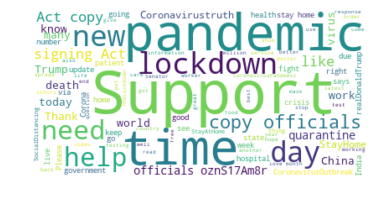

In [26]:
wc = WordCloud(background_color='white'
               ,max_words=100
               ,stopwords=stop).generate(' '.join(doc_complete))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
# clean data of stop, irrelevant and redundant words
def clean(text):
    tokenized = nltk.word_tokenize(text)
    stop_free = [i.lower() for i in tokenized if i.lower() not in stop and i.isalpha() and len(i)>3]
    return stop_free

cleaned = [clean(i) for i in doc_complete]
print(cleaned)

[['science', 'hurting', 'government', 'response', 'report', 'trump', 'idiots', 'charge', 'science', 'results', 'good', 'like', 'asking', 'seanhannity', 'serious', 'aint', 'happen'], ['coronavirusoutbreak', 'china', 'unexpectedly', 'cuts', 'reverse', 'repo', 'rate', 'five', 'years', 'support', 'economy', 'news', 'agency', 'reuters', 'follow', 'updates'], ['citizen', 'york', 'commits', 'suicide', 'infected', 'corona', 'seenews', 'كورونا'], ['hmrc', 'launched', 'information', 'service', 'whatsapp', 'official', 'advice', 'information', 'directly', 'government', 'started', 'whatsapping', 'stay', 'home', 'protect', 'save', 'lives', 'stayhomesavelives'], ['andekhaasach', 'infestations', 'like', 'specially', 'created', 'nature', 'pestilence', 'like', 'asaram', 'releasing', 'defeat', 'whole', 'plan', 'nature', 'trust', 'almighty', 'works', 'mysterious', 'ways'], ['though', 'human', 'costs', 'pandemics', 'dreadful', 'economic', 'effects', 'economist', 'pandemic', 'recession', 'lockdown'], ['anot

In [28]:
# create a dictionary of words in the tweets /  documents
dictionary = corpora.Dictionary(cleaned)
for i in dictionary:
    print(i,dictionary[i])

0 aint
1 asking
2 charge
3 good
4 government
5 happen
6 hurting
7 idiots
8 like
9 report
10 response
11 results
12 science
13 seanhannity
14 serious
15 trump
16 agency
17 china
18 coronavirusoutbreak
19 cuts
20 economy
21 five
22 follow
23 news
24 rate
25 repo
26 reuters
27 reverse
28 support
29 unexpectedly
30 updates
31 years
32 citizen
33 commits
34 corona
35 infected
36 seenews
37 suicide
38 york
39 كورونا
40 advice
41 directly
42 hmrc
43 home
44 information
45 launched
46 lives
47 official
48 protect
49 save
50 service
51 started
52 stay
53 stayhomesavelives
54 whatsapp
55 whatsapping
56 almighty
57 andekhaasach
58 asaram
59 created
60 defeat
61 infestations
62 mysterious
63 nature
64 pestilence
65 plan
66 releasing
67 specially
68 trust
69 ways
70 whole
71 works
72 costs
73 dreadful
74 economic
75 economist
76 effects
77 human
78 lockdown
79 pandemic
80 pandemics
81 recession
82 though
83 another
84 compiled
85 link
86 allowed
87 bank
88 business
89 different
90 sixfeetapart
91 t

1057 distancing
1058 donald
1059 drugs
1060 dying
1061 formula
1062 money
1063 neither
1064 priority
1065 social
1066 sooner
1067 statistics
1068 terrorists
1069 trafficking
1070 wrong
1071 alone
1072 bloody
1073 bottled
1074 itsokaytonotbeokay
1075 tutors
1076 wecandothis
1077 westns
1078 whatever
1079 americas
1080 corporate
1081 democratic
1082 greatest
1083 investigate
1084 party
1085 qarantine
1086 refuse
1087 threat
1088 wakeupamerica
1089 wuhanvirus
1090 becomes
1091 country
1092 kits
1093 netherlands
1094 brought
1095 discrimination
1096 facilities
1097 kept
1098 pests
1099 poor
1100 rich
1101 treated
1102 almost
1103 parody
1104 streetcredva
1105 trinbagonian
1106 trinidadandtobago
1107 across
1108 brewerfornc
1109 disinfect
1110 front
1111 gratitude
1112 join
1113 line
1114 nation
1115 night
1116 responding
1117 sacrifices
1118 thanking
1119 washyourhands
1120 flagrant
1121 fouls
1122 clapforourcarers
1123 doctor
1124 active
1125 checking
1126 extremely
1127 homes
1128 wonder

2057 bills
2058 comply
2059 convenient
2060 encourages
2061 guidelines
2062 offices
2063 options
2064 prioritize
2065 safety
2066 visiting
2067 coldfusion
2068 coronafighters
2069 definitely
2070 medicines
2071 origin
2072 possible
2073 premature
2074 regarding
2075 routes
2076 salute
2077 spreading
2078 apologies
2079 flock
2080 jerome
2081 passes
2082 receive
2083 strays
2084 thus
2085 arundhatikapoor
2086 instructions
2087 shsyuswibskakkq
2088 generation
2089 rosietheriveter
2090 seamstresses
2091 upmc
2092 speedobandit
2093 steveguest
2094 faheemyounus
2095 globalpandemic
2096 staggering
2097 vikrammotwane
2098 blocking
2099 entry
2100 philippines
2101 rosario
2102 usec
2103 vergeire
2104 billionaires
2105 born
2106 british
2107 firmly
2108 foreigners
2109 millions
2110 philanthropist
2111 whilst
2112 airlines
2113 deliveroo
2114 done
2115 easy
2116 uber
2117 virgin
2118 amusing
2119 audience
2120 comedic
2121 comedy
2122 element
2123 greases
2124 humour
2125 joke
2126 laughing
212

3057 games
3058 moved
3059 nominating
3060 stopthesenonsense
3061 advantage
3062 awareness
3063 cyberattack
3064 cybercriminals
3065 international
3066 threats
3067 restinpeace
3068 barilaro
3069 bluemountains
3070 drought
3071 issued
3072 nswfires
3073 nswpol
3074 pleaded
3075 recovery
3076 regional
3077 shelved
3078 sydneysiders
3079 tourism
3080 foxandfriends
3081 reelected
3082 band
3083 bands
3084 extra
3085 formed
3086 keepsmiling
3087 mile
3088 began
3089 central
3090 expected
3091 operational
3092 sunday
3093 tuesday
3094 backtowork
3095 hubei
3096 offline
3097 opened
3098 province
3099 netflixnchill
3100 qurantine
3101 relatable
3102 workingfromhome
3103 funday
3104 lalockdown
3105 losangeleslockdown
3106 minus
3107 shelterinplace
3108 fucking
3109 hardest
3110 lived
3111 strangers
3112 holy
3113 june
3114 tenth
3115 allianztravelus
3116 amtrak
3117 definition
3118 explain
3119 recent
3120 reimbursed
3121 trip
3122 importance
3123 lgcares
3124 lourdeswgn
3125 mentalhealthmonda

4057 hariri
4058 lebanese
4059 raffik
4060 tribute
4061 biaus
4062 boris
4063 chinacoronavirus
4064 furious
4065 liars
4066 reportedly
4067 wuhancoronavius
4068 jeebus
4069 aifen
4070 became
4071 forbidden
4072 hundreds
4073 reveal
4074 familyleave
4075 sickleave
4076 workersrights
4077 pultedaily
4078 accidental
4079 carer
4080 cover
4081 error
4082 fugley
4083 manor
4084 spelling
4085 battle
4086 equip
4087 fightcorona
4088 safetyfirst
4089 sconceglobal
4090 stopthespread
4091 collected
4092 critically
4093 sandiego
4094 spies
4095 breakthesilence
4096 depression
4097 dontsufferinsilence
4098 endthestigma
4099 hotlines
4100 keeptalkingmh
4101 mentalhealthmatters
4102 mindhealth
4103 sicknotweak
4104 stigmafree
4105 stress
4106 timetotalk
4107 dashboards
4108 dissemination
4109 visualizations
4110 chest
4111 georgetown
4112 kenpo
4113 noexcuses
4114 autonews
4115 circuit
4116 indianarmy
4117 migrant
4118 shelter
4119 honeywell
4120 jockey
4121 proctergamble
4122 chennai
4123 seize
412

5056 reception
5057 sofie
5058 wewillgetthroughthistogether
5059 ashburn
5060 bikeride
5061 northernvirginia
5062 trail
5063 trailbike
5064 wandodtrail
5065 hockey
5066 bars
5067 enforce
5068 imported
5069 saturday
5070 visas
5071 visitors
5072 weapons
5073 cannabis
5074 cannabisbusiness
5075 cannabisdata
5076 cannabisnews
5077 cannabispodcast
5078 cannabissales
5079 cannabistech
5080 headset
5081 marijuananews
5082 talkinghedgepodcast
5083 aftteach
5084 aftunion
5085 edchat
5086 educhat
5087 newshourextra
5088 arkansas
5089 chances
5090 declares
5091 disaster
5092 jonesboro
5093 oklahoma
5094 rain
5095 tornado
5096 tampa
5097 cytosorbents
5098 matthewherper
5099 maxwatsonosu
5100 colour
5101 communicators
5102 creative
5103 depictions
5104 designers
5105 evocative
5106 illustrators
5107 realm
5108 journalists
5109 herat
5110 protecting
5111 staysafeherat
5112 amidst
5113 bear
5114 brunt
5115 chronic
5116 distribution
5117 equitable
5118 hinted
5119 indonesia
5120 production
5121 ramp


6056 larges
6057 podsaveamerica
6058 carolekilledherhusband
6059 cats
6060 joeexotic
6061 kittens
6062 amass
6063 lessons
6064 shoutout
6065 sight
6066 unaids
6067 cloak
6068 force
6069 hovering
6070 invisible
6071 rips
6072 smothering
6073 suffocating
6074 attempting
6075 corporations
6076 frenzy
6077 lexus
6078 manipulative
6079 opportunism
6080 unethical
6081 unprofessional
6082 hallelujah
6083 recovering
6084 smninews
6085 sonnyangara
6086 spring
6087 jail
6088 sheet
6089 biloxi
6090 davidmdrucker
6091 firefighters
6092 gulf
6093 harrison
6094 overwhelmed
6095 spike
6096 tatereeves
6097 broadcasting
6098 imrankhan
6099 recorded
6100 heartfelt
6101 butterfly
6102 jesse
6103 wings
6104 karmagawa
6105 lockdownsa
6106 swineflu
6107 westcheshireccg
6108 cross
6109 exact
6110 networks
6111 oliverdarcy
6112 overtime
6113 buycanadian
6114 etsy
6115 merchants
6116 sale
6117 welldotca
6118 alphagraphics
6119 craziest
6120 mudahterhibur
6121 obligated
6122 stayinstaysafe
6123 components
6124 

6954 seyi
6955 kristen
6956 zwiener
6957 clarity
6958 fitness
6959 gethealthyphl
6960 messaging
6961 philadelphiagov
6962 philly
6963 alibaba
6964 alibabagroup
6965 equipments
6966 jack
6967 sets
6968 brokeback
6969 ghey
6970 harry
6971 lgbtquarantine
6972 lockdownaustralia
6973 lockdownforlove
6974 mountain
6975 potter
6976 trivia
6977 viewing
6978 interaction
6979 joancbaez
6980 johnprine
6981 poignant
6982 deceit
6983 stateofdeceit
6984 vengeance
6985 denning
6986 kspol
6987 kspoli
6988 kspolitics
6989 laurakellyks
6990 morgan
6991 parker
6992 ethos
6993 flightsimulator
6994 inaugural
6995 lockheedmartin
6996 msteams
6997 positivenews
6998 togetherathome
6999 togetherwewin
7000 virtualtravel
7001 tunisia
7002 xinhua
7003 circumstance
7004 gladness
7005 heartwork
7006 lake
7007 ozark
7008 coronaviruskashmir
7009 fayettevillenc
7010 forgot
7011 headaches
7012 lockdownnigeria
7013 pressing
7014 announces
7015 naomi
7016 embraced
7017 multiculturalism
7018 spit
7019 apkkambr
7020 swift


7806 gccisd
7807 gcmsoftball
7808 ladypatriots
7809 softball
7810 varsity
7811 acted
7812 decisively
7813 heeded
7814 butt
7815 templates
7816 thingiverse
7817 yoooooooo
7818 birmingham
7819 manchester
7820 nightingale
7821 northeast
7822 northsouthdivide
7823 cardionerds
7824 subsctibe
7825 ambazonia
7826 anglophonecrisis
7827 ballard
7828 cameroon
7829 gods
7830 southerncameroons
7831 vvis
7832 yayy
7833 bsbarmy
7834 foxtv
7835 howied
7836 kevinrichardson
7837 nickcarter
7838 twill
7839 azure
7840 chatbots
7841 intros
7842 microsoft
7843 perficient
7844 brother
7845 grandfather
7846 grandmother
7847 uncle
7848 kenlcg
7849 legal
7850 primacy
7851 principles
7852 diagnosis
7853 jkmetromediatalent
7854 sophie
7855 trudeau
7856 catastrophic
7857 confident
7858 emerge
7859 prove
7860 chiara
7861 driskell
7862 ongoing
7863 undp
7864 isolationawakening
7865 occupants
7866 reboot
7867 stayalive
7868 transisbeautiful
7869 weareallbeautiful
7870 weareone
7871 mepolitics
7872 maths
7873 rolls
7

8805 trtworldnow
8806 laziness
8807 announcements
8808 mecfs
8809 dailybriefing
8810 slides
8811 thesepeoplearesick
8812 credibility
8813 foxnewslies
8814 whatsoever
8815 bickford
8816 claxton
8817 govjanetmills
8818 cheesy
8819 deaden
8820 instrumentals
8821 soul
8822 communication
8823 walker
8824 breakup
8825 dawsoncity
8826 exploreyukon
8827 iode
8828 moves
8829 oldest
8830 yukon
8831 surgical
8832 metal
8833 pedal
8834 decreased
8835 knockers
8836 unchanged
8837 washed
8838 coins
8839 congrats
8840 gamedev
8841 indiedev
8842 indiedevhour
8843 luck
8844 madewithunity
8845 mobiledev
8846 mobilegame
8847 winningslots
8848 feeding
8849 indiacometogether
8850 shopkeepers
8851 charlotte
8852 fablab
8853 facemasks
8854 isinnova
8855 machining
8856 modified
8857 parts
8858 pitching
8859 subcontractor
8860 weerg
8861 wreaking
8862 therock
8863 davidlipeng
8864 guillotine
8865 orderly
8866 queue
8867 coronavirusmichigan
8868 protocol
8869 prayforworld
8870 copays
8871 deductibles
8872 premi

9805 proceeds
9806 seoul
9807 challo
9808 database
9809 newer
9810 partial
9811 productivity
9812 sake
9813 sarkar
9814 scraping
9815 wasting
9816 kavanagh
9817 lawrence
9818 tobacco
9819 transmit
9820 abcnews
9821 blackvoices
9822 cbsnews
9823 recommending
9824 franklin
9825 photojournalism
9826 southseattle
9827 stoplight
9828 quarantining
9829 abudhabi
9830 collaborative
9831 dhabi
9832 disorders
9833 endocrinology
9834 metabolic
9835 metabolism
9836 weightloss
9837 winger
9838 pompeo
9839 guardian
9840 mislay
9841 negligent
9842 rectify
9843 aged
9844 sindhhealth
9845 twice
9846 chronicles
9847 phobia
9848 taskforce
9849 timing
9850 boycott
9851 chinamustpay
9852 italycoronavirus
9853 italylockdown
9854 lockdownsouthafrica
9855 uklockdownnow
9856 ropes
9857 texting
9858 alberta
9859 insult
9860 shitty
9861 tout
9862 partisan
9863 authorcarolfiore
9864 climatefiction
9865 finnegan
9866 mondays
9867 puppies
9868 puppy
9869 sherrie
9870 bbcpm
9871 dependent
9872 disseminate
9873 gulli

10747 spewing
10748 illustration
10749 newyorker
10750 ware
10751 booklover
10752 virginiawoolf
10753 elmhurst
10754 flimsy
10755 icus
10756 worn
10757 leonard
10758 petra
10759 cmrelieffund
10760 earned
10761 kartikaaryan
10762 pmcaresfund
10763 theaaryankartik
10764 winstonsih
10765 distant
10766 socially
10767 bahl
10768 easypaisa
10769 habib
10770 jazzcash
10771 cassini
10772 cassiniprojekt
10773 projekt
10774 overlap
10775 ajcaleca
10776 carlosraulher
10777 commander
10778 deptofdefense
10779 homelanddefense
10780 noradcommand
10781 northcom
10782 participation
10783 shaughnessy
10784 usnortherncmd
10785 verdad
10786 wehavethewatch
10787 contributes
10788 kchirutweets
10789 trumpwarroom
10790 andreascousins
10791 andrewcuomo
10792 carlheastie
10793 deportations
10794 libertydefenseproject
10795 newyorkunited
10796 booked
10797 charges
10798 unlawful
10799 squares
10800 stole
10801 besa
10802 david
10803 frise
10804 membership
10805 baseball
10806 baseballism
10807 texaslive
10808 

11555 prioritising
11556 abuelezam
11557 ckcic
11558 epidemiologist
11559 kirsten
11560 nadia
11561 perspectives
11562 qanonfrance
11563 zerohedge
11564 ntnunorway
11565 stolavshospital
11566 trondheim
11567 adhesives
11568 foam
11569 makara
11570 urethane
11571 ducking
11572 familyhero
11573 heroic
11574 played
11575 biking
11576 exercising
11577 permitted
11578 amwriting
11579 booksconnectus
11580 creekviewranch
11581 creekviewranchpta
11582 dcjesd
11583 dollyparton
11584 dollyslibrary
11585 drycreekschools
11586 teacherstrong
11587 yourcrpta
11588 losses
11589 mongolia
11590 gehealthcare
11591 hamiltonmedical
11592 manufacturers
11593 ventec
11594 consultation
11595 educationgovuk
11596 postpone
11597 settled
11598 mediatraining
11599 sessions
11600 suewhitewriter
11601 tailored
11602 induced
11603 lays
11604 fishing
11605 gameplay
11606 mytimeatportia
11607 retrowave
11608 streaming
11609 supportsmallstreamers
11610 concentrate
11611 coronavirusinfection
11612 robotics
11613 scienc

12554 infants
12555 advocate
12556 alyssia
12557 clark
12558 lebron
12559 pennies
12560 allidoisowen
12561 hides
12562 suppresses
12563 warroomshow
12564 freeze
12565 intellecapceo
12566 intellecaptweet
12567 raivineet
12568 startupstory
12569 bankubye
12570 beaten
12571 ldus
12572 policemen
12573 receipt
12574 clothing
12575 instrumental
12576 precautionary
12577 thorough
12578 modrnhealthcr
12579 redeploy
12580 flying
12581 travelers
12582 welcoming
12583 astonomy
12584 astronomy
12585 bepicolombo
12586 exploration
12587 flyby
12588 spacescience
12589 ediong
12590 wailers
12591 gpnews
12592 covidab
12593 deena
12594 hinshaw
12595 googling
12596 legs
12597 montana
12598 vacationing
12599 affinity
12600 crystal
12601 receptor
12602 recognition
12603 reveals
12604 structure
12605 upending
12606 pearls
12607 aiiamericangiri
12608 supposedly
12609 coronakindness
12610 tfletcher
12611 encouragement
12612 mybcu
12613 mercyless
12614 steelindustry
12615 ukmfgnews
12616 croydoncops
12617 norb

13304 belton
13305 constructed
13306 coronovirusindia
13307 brexiters
13308 embassy
13309 helps
13310 maligned
13311 rank
13312 rated
13313 burr
13314 doctaaaaaah
13315 elizamsomers
13316 ensured
13317 importantly
13318 jmboh
13319 loeffler
13320 allowance
13321 surpriseme
13322 suya
13323 assetfolio
13324 transformation
13325 coronafreepakistan
13326 stayhomestayblessed
13327 bird
13328 swine
13329 aging
13330 peoplemgt
13331 yvonnesonsino
13332 ayushmaregmi
13333 fronts
13334 unravels
13335 coronav
13336 coronavir
13337 cuarentena
13338 likee
13339 pandemia
13340 yomequedoencasa
13341 kuddus
13342 cartons
13343 cottage
13344 upsurge
13345 iycmaha
13346 maha
13347 satyajeettambe
13348 lmac
13349 skateboard
13350 bell
13351 fariss
13352 camel
13353 prophet
13354 theislamicummah
13355 kisan
13356 mahyco
13357 upfront
13358 snakes
13359 cnnnewsroom
13360 inbox
13361 lily
13362 plants
13363 purchase
13364 freezeallbills
13365 failureinchief
13366 inaction
13367 indecisiveness
13368 panick

14167 evident
14168 rubbish
14169 zerowaste
14170 culinary
14171 housemates
14172 iron
14173 noodles
14174 quarantinecooking
14175 toppings
14176 drrodesilva
14177 globalisation
14178 shipment
14179 rishi
14180 sunak
14181 ahbeg
14182 contents
14183 furlough
14184 skypapers
14185 ukpolitics
14186 mondayinmarch
14187 caronavirus
14188 criminalizing
14189 inevitable
14190 ralphnortham
14191 egregious
14192 pics
14193 realtuckfrumper
14194 bigotry
14195 extremists
14196 hategroups
14197 radicalization
14198 gentlemen
14199 itsadequate
14200 nostalgia
14201 believed
14202 driveway
14203 felled
14204 investigated
14205 knox
14206 sheriff
14207 tree
14208 vinalhaven
14209 wander
14210 willingness
14211 depends
14212 proximity
14213 aspca
14214 bcfglobal
14215 killings
14216 newyorkcity
14217 nycacc
14218 digiday
14219 digitaladvertising
14220 onlineadvertising
14221 programmatic
14222 publishers
14223 distinction
14224 keepers
14225 reconcile
14226 belong
14227 lahore
14228 covidexplained
14

15054 vicpastouch
15055 arstechnica
15056 falsehoods
15057 katyturnbc
15058 mtpdaily
15059 mussed
15060 aricans
15061 curbing
15062 sagda
15063 crows
15064 gins
15065 ksleg
15066 norman
15067 vimeo
15068 beeahuae
15069 sharjah
15070 sharjahmunicipality
15071 sharjahpolice
15072 shjmunicipality
15073 infra
15074 lgus
15075 deferred
15076 penalty
15077 tiaa
15078 aprilfools
15079 aprilfoolsday
15080 coronapocolypse
15081 bromley
15082 lbofbromley
15083 brains
15084 pusb
15085 stilltop
15086 celia
15087 coronavirusnj
15088 cointelegraph
15089 officialmudrex
15090 cnet
15091 devices
15092 generally
15093 rooms
15094 residency
15095 chirp
15096 grabdna
15097 grandma
15098 grandpa
15099 governmentza
15100 structures
15101 shazbkhanzdageo
15102 barbie
15103 heels
15104 legit
15105 legos
15106 behaving
15107 fakecases
15108 leaglterrorism
15109 sifhyderabad
15110 troubled
15111 accountants
15112 accountingweb
15113 ericgarland
15114 louisemensch
15115 mgnigni
15116 myriad
15117 thespybrief
151

In [29]:
#index the words and calculate the frequency of each word in each sentence
document_term_matrix = [dictionary.doc2bow(i) for i in cleaned]
print(document_term_matrix)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1)], [(16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)], [(32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1)], [(4, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)], [(8, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1)], [(72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1)], [(44, 1), (83, 1), (84, 1), (85, 1)], [(86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1)], [(93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1

In [30]:
lda = gensim.models.ldamodel.LdaModel
ldamodel = lda(document_term_matrix, num_topics=10, id2word = dictionary)
print(ldamodel)

LdaModel(num_terms=15634, num_topics=10, decay=0.5, chunksize=2000)


In [31]:
# create 10 topics
top_10 = ldamodel.print_topics(num_topics=10, num_words=10)
top_10

[(0,
  '0.016*"support" + 0.014*"officials" + 0.013*"copy" + 0.013*"signing" + 0.013*"senator" + 0.012*"representative" + 0.009*"help" + 0.008*"lockdown" + 0.006*"china" + 0.005*"govparsonmo"'),
 (1,
  '0.013*"deaths" + 0.012*"pandemic" + 0.009*"confirmed" + 0.005*"number" + 0.005*"testing" + 0.005*"update" + 0.005*"world" + 0.005*"across" + 0.004*"china" + 0.004*"social"'),
 (2,
  '0.009*"world" + 0.007*"like" + 0.007*"lockdown" + 0.007*"work" + 0.006*"read" + 0.006*"health" + 0.005*"effect" + 0.005*"spread" + 0.004*"crisis" + 0.004*"australia"'),
 (3,
  '0.020*"support" + 0.020*"representative" + 0.018*"officials" + 0.017*"signing" + 0.017*"copy" + 0.013*"senator" + 0.010*"govabbott" + 0.009*"txpolitics" + 0.006*"like" + 0.005*"lockdown"'),
 (4,
  '0.012*"pandemic" + 0.012*"time" + 0.010*"state" + 0.009*"home" + 0.006*"order" + 0.005*"crisis" + 0.005*"patients" + 0.005*"stay" + 0.005*"stayathomeandstaysafe" + 0.005*"today"'),
 (5,
  '0.006*"news" + 0.006*"foxnews" + 0.005*"rondesanti

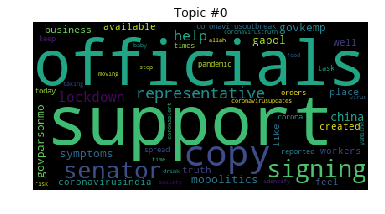

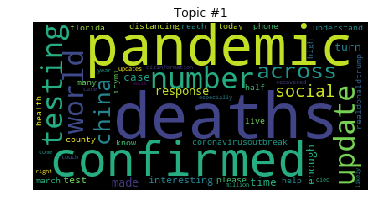

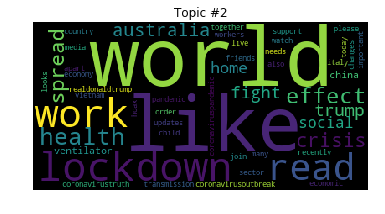

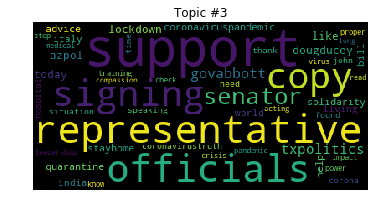

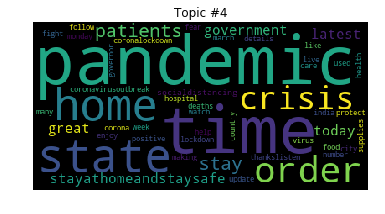

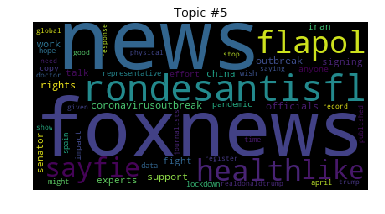

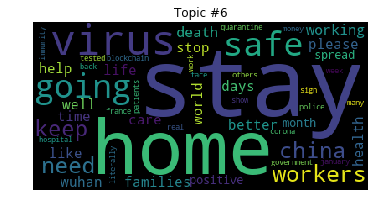

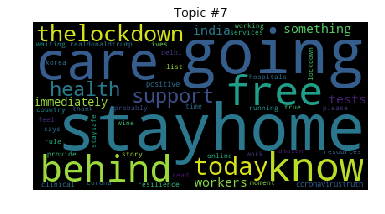

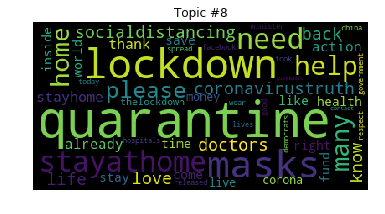

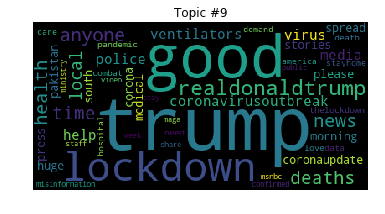

In [33]:
for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamodel .show_topic(t, 50))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show() 

The Dominant topic and its percentage contribution in each Tweet - 
In LDA models, each Tweet is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.



In [35]:
def format_topics_sentences(ldamodel=None, corpus=document_term_matrix, texts=doc_complete):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=document_term_matrix, texts=cleaned)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9.0,0.9499,"trump, good, lockdown, realdonaldtrump, anyone...","[science, hurting, government, response, repor..."
1,1,5.0,0.9470,"news, foxnews, rondesantisfl, flapol, health, ...","[coronavirusoutbreak, china, unexpectedly, cut..."
2,2,7.0,0.8998,"stayhome, going, care, free, know, behind, tod...","[citizen, york, commits, suicide, infected, co..."
3,3,5.0,0.7038,"news, foxnews, rondesantisfl, flapol, health, ...","[hmrc, launched, information, service, whatsap..."
4,4,3.0,0.7961,"support, representative, officials, signing, c...","[andekhaasach, infestations, like, specially, ..."
5,5,2.0,0.9249,"world, like, lockdown, work, read, health, eff...","[though, human, costs, pandemics, dreadful, ec..."
6,6,3.0,0.4830,"support, representative, officials, signing, c...","[another, link, compiled, information]"
7,7,0.0,0.8873,"support, officials, copy, signing, senator, re...","[business, different, world, allowed, bank, ti..."
8,8,3.0,0.4700,"support, representative, officials, signing, c...","[funny, many, finding, references, thinking, s..."
9,9,7.0,0.6265,"stayhome, going, care, free, know, behind, tod...","[hutton, director, financial, markets, niagara..."


When it comes to the keywords in the topics, the importance (weights) of the keywords matters. 
Along with that, how frequently the words have appeared in the documents is also interesting to look.

Let’s plot the word counts and the weights of each keyword in the same chart.

You want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. 
Often such words turn out to be less important. 


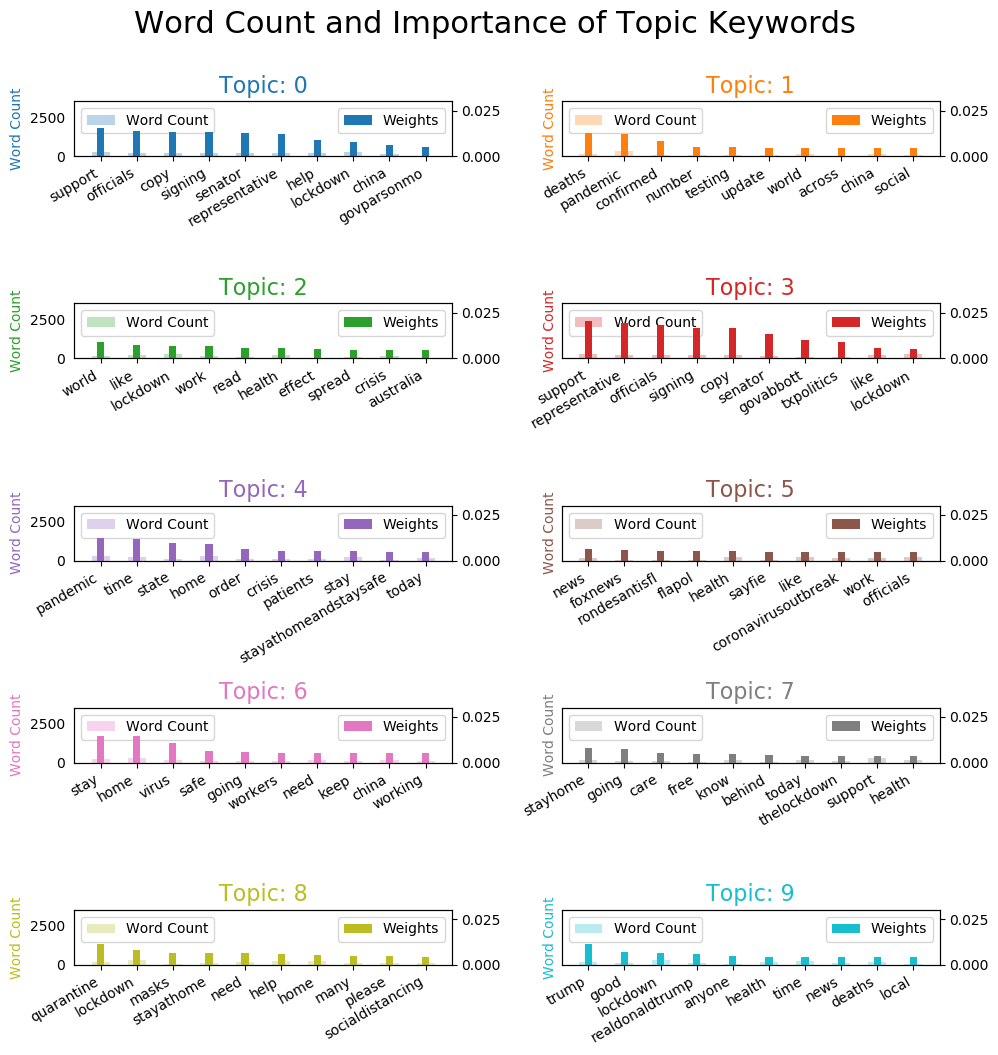

In [36]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in cleaned for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

dataf = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(10,10), sharey=True, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=dataf.loc[dataf.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=dataf.loc[dataf.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dataf.loc[dataf.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [37]:
topics

[(0,
  [('support', 0.01562443),
   ('officials', 0.014088567),
   ('copy', 0.013069149),
   ('signing', 0.013039653),
   ('senator', 0.012587166),
   ('representative', 0.011945299),
   ('help', 0.009109351),
   ('lockdown', 0.0076314583),
   ('china', 0.006189471),
   ('govparsonmo', 0.0051918114)]),
 (1,
  [('deaths', 0.012753423),
   ('pandemic', 0.01230532),
   ('confirmed', 0.008617643),
   ('number', 0.0052904887),
   ('testing', 0.0051932787),
   ('update', 0.0048172134),
   ('world', 0.0046714223),
   ('across', 0.0046414784),
   ('china', 0.0044145267),
   ('social', 0.004330887)]),
 (2,
  [('world', 0.008874538),
   ('like', 0.007435573),
   ('lockdown', 0.006909063),
   ('work', 0.0066534723),
   ('read', 0.0058196043),
   ('health', 0.0056835013),
   ('effect', 0.00496858),
   ('spread', 0.0045032883),
   ('crisis', 0.004493569),
   ('australia', 0.0044036605)]),
 (3,
  [('support', 0.020206857),
   ('representative', 0.019516533),
   ('officials', 0.018096562),
   ('signi

 visualise the information contained in a topic model.

In [18]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, document_term_matrix, dictionary=ldamodel.id2word)
vis

/Users/buinhi/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.061196 -0.101312       1        1  16.004534
2      0.016966 -0.018751       2        1  10.495096
0      0.060327 -0.064095       3        1  10.341166
6      0.058348  0.004347       4        1  10.322284
9     -0.071711 -0.089891       5        1  10.156660
5      0.015382 -0.002889       6        1   9.490715
4     -0.227404  0.011777       7        1   9.482208
3      0.050705  0.072831       8        1   9.066305
1      0.041943  0.079584       9        1   8.213170
8     -0.005751  0.108400      10        1   6.427859, topic_info=     Category        Freq            Term       Total  loglift  logprob
192   Default  184.000000  representative  184.000000  30.0000  30.0000
3     Default  195.000000       delivered  195.000000  29.0000  29.0000
194   Default  178.000000         signing  178.000000  28.0000  28.0000
187   Default  186.000000         deliver  186.000000  27.0000  27.0000
186   Default  180.000000            copy  180.000000  26.0000  26.0000
190   Default  196.000000       officials  196.000000  25.0000  25.0000
193   Default  165.000000         senator  165.000000  24.0000  24.0000
195   Default  267.000000         support  267.000000  23.0000  23.0000
189   Default  263.000000            last  263.000000  22.0000  22.0000
95    Default  266.000000           cases  266.000000  21.0000  21.0000
12    Default  104.000000         workers  104.000000  20.0000  20.0000
691   Default  251.000000        lockdown  251.000000  19.0000  19.0000
502   Default  157.000000          deaths  157.000000  18.0000  18.0000
197   Default   40.000000      txpolitics   40.000000  17.0000  17.0000
188   Default   40.000000       govabbott   40.000000  16.0000  16.0000
4706  Default   35.000000     govparsonmo   35.000000  15.0000  15.0000
825   Default  189.000000           trump  189.000000  14.0000  14.0000
4708  Default   33.000000      mopolitics   33.000000  13.0000  13.0000
441   Default  230.000000            help  230.000000  12.0000  12.0000
1131  Default  107.000000          social  107.000000  11.0000  11.0000
927   Default   58.000000           needs   58.000000  10.0000  10.0000
224   Default   32.000000        governor   32.000000   9.0000   9.0000
4023  Default   34.000000         nigeria   34.000000   8.0000   8.0000
114   Default  146.000000      quarantine  146.000000   7.0000   7.0000
1299  Default  137.000000            work  137.000000   6.0000   6.0000
554   Default  113.000000            days  113.000000   5.0000   5.0000
230   Default  129.000000           would  129.000000   4.0000   4.0000
1169  Default   81.000000           march   81.000000   3.0000   3.0000
3577  Default   25.000000      appreciate   25.000000   2.0000   2.0000
2308  Default   30.000000          humans   30.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
175   Topic10    7.575596        approval    9.653392   2.5022  -6.2400
508   Topic10    7.589907           quick    9.714384   2.4977  -6.2381
4327  Topic10    5.704548           smile    6.856976   2.5605  -6.5237
4228  Topic10   10.111487           items   14.386910   2.3919  -5.9513
7058  Topic10    8.255911          parent   11.130085   2.4458  -6.1540
348   Topic10   16.426378           visit   28.132475   2.2065  -5.4660
3756  Topic10   13.169626            lack   21.031477   2.2764  -5.6870
400   Topic10   14.348212         florida   25.569893   2.1667  -5.6013
2290  Topic10   12.217949           click   20.177391   2.2429  -5.7620
4301  Topic10    9.453882          proper   13.781659   2.3676  -6.0185
4326  Topic10   11.522783          inside   19.851538   2.2006  -5.8206
2847  Topic10   15.527375            fuck   32.024303   2.0206  -5.5223
681   Topic10   18.755259            link   44.776825   1.8743  -5.3335
2308  Topic10   14.425580          humans   30.539913   1.9945  -5.59

In [38]:
output=open('tweet_30th.txt','w')
with open('loughran_negative.txt', 'r') as f:
    list_of_neg = [x.lower().strip('\n') for x in f.readlines()]
    negative =' '.join(list_of_neg)

add_stop=['covid-19', 'coronavirus', 'covid', 'region', 'case', 'new', 'cases']

with open('loughran_positive.txt', 'r') as f:
    list_of_pos = [x.lower().strip('\n') for x in f.readlines()]
    positive =' '.join(list_of_pos)



In [39]:
def get_neg(text):
    neg_list = []
    wordlist = (text)
    for n in set(list_of_neg):
        for word in wordlist:
            if word == n:
                neg_list.append(word)
    return neg_list

def get_pos(text):
    pos_list = []
    wordlist= (text)
    for p in set(list_of_pos):
        for word in wordlist:
            if word == p:
                pos_list.append(word)
    return pos_list

def neg_sentiment(text):
    count=0
    wordlist=nltk.word_tokenize(text.lower().strip('\n'))
    for word in wordlist:
        if word in negative:
            count+=1
    return count/len(wordlist)


def pos_sentiment(text):
    count=0
    wordlist=nltk.word_tokenize(text.lower().strip('\n'))
    for word in wordlist:
        if word in positive:
            count+=1
    return count/len(wordlist)

In [40]:
#overall common words
word_list = [word for line in cleaned for word in line]
freq=nltk.FreqDist(word_list)
print(freq.most_common(10))

[('pandemic', 317), ('support', 307), ('lockdown', 288), ('home', 271), ('help', 239), ('stay', 235), ('officials', 224), ('time', 221), ('representative', 209), ('like', 207)]


In [41]:
#neg common words
neg_list = [' '.join(get_neg(l)) for l in cleaned]
neg_list = ' '.join(neg_list)
neg_list=nltk.word_tokenize(neg_list)
neg_freq = nltk.FreqDist(neg_list)
print(neg_freq.most_common(10))

[('help', 239), ('need', 193), ('crisis', 131), ('fight', 118), ('death', 78), ('order', 71), ('outbreak', 63), ('emergency', 48), ('disease', 44), ('show', 40)]


In [42]:
pos_list = [' '.join(get_pos(l)) for l in cleaned]
pos_list = ' '.join(pos_list)
pos_list=nltk.word_tokenize(pos_list)
pos_freq = nltk.FreqDist(pos_list)
print(pos_freq.most_common(10))

[('support', 307), ('home', 271), ('help', 239), ('like', 207), ('health', 201), ('know', 146), ('please', 146), ('good', 125), ('care', 121), ('safe', 107)]


In [43]:
def bar_chart(word,count,title,xlabel,ylabel):
    plt.figure(figsize=(7,5))
    plt.bar(word, count, width=0.4)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    locs,label = plt.xticks()
    plt.xticks(rotation=45, ha='right')
    plt.show()

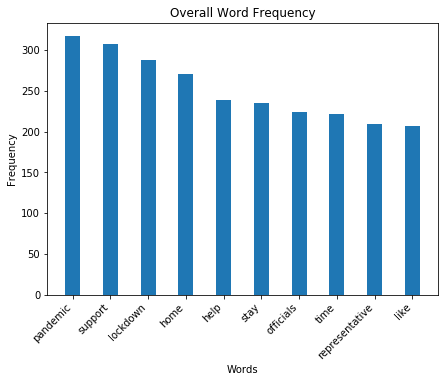

In [44]:
#Overall common
count = [c for (w,c) in freq.most_common(10)]
most10 = [w for (w,c) in freq.most_common(10)]
bar_chart(most10,count,'Overall Word Frequency','Words','Frequency')

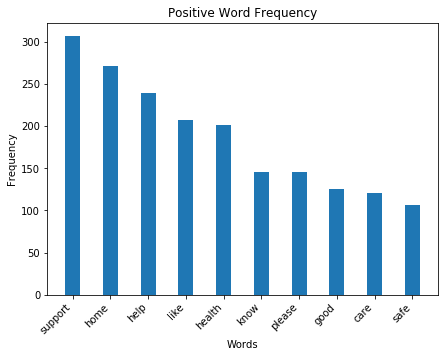

In [45]:
#positive common
count = [c for (w,c) in pos_freq.most_common(10)]
most10 = [w for (w,c) in pos_freq.most_common(10)]
bar_chart(most10,count,'Positive Word Frequency','Words','Frequency')

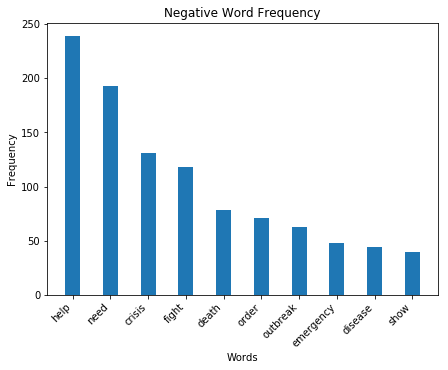

In [46]:
#negative common
count = [c for (w,c) in neg_freq.most_common(10)]
most10 = [w for (w,c) in neg_freq.most_common(10)]
bar_chart(most10,count,'Negative Word Frequency','Words','Frequency')

In [65]:
lda = gensim.models.ldamodel.LdaModel
ldamodel = lda(document_term_matrix, num_topics=3, id2word = dictionary)
print(ldamodel)

LdaModel(num_terms=15634, num_topics=3, decay=0.5, chunksize=2000)


In [66]:
# create 3 topics
top_3 = ldamodel.print_topics(num_topics=3, num_words=10)
top_3

[(0,
  '0.006*"home" + 0.006*"time" + 0.005*"pandemic" + 0.005*"stay" + 0.004*"lockdown" + 0.004*"quarantine" + 0.003*"like" + 0.003*"stayhome" + 0.003*"today" + 0.003*"health"'),
 (1,
  '0.010*"support" + 0.009*"officials" + 0.008*"representative" + 0.008*"signing" + 0.008*"copy" + 0.007*"senator" + 0.005*"china" + 0.004*"help" + 0.004*"pandemic" + 0.004*"coronavirusoutbreak"'),
 (2,
  '0.005*"health" + 0.004*"says" + 0.004*"help" + 0.004*"today" + 0.003*"lockdown" + 0.003*"spread" + 0.003*"virus" + 0.003*"home" + 0.003*"workers" + 0.003*"need"')]

In [67]:
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

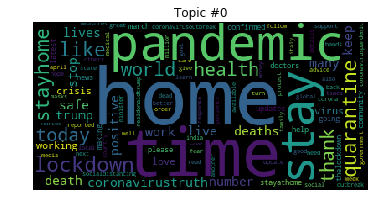

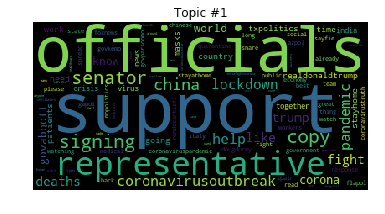

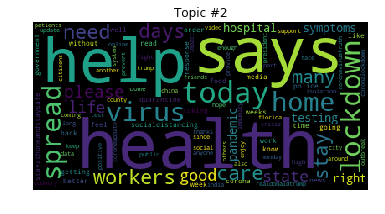

In [68]:
for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamodel .show_topic(t, 100))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show() 

In [69]:
def format_topics_sentences(ldamodel=None, corpus=document_term_matrix, texts=doc_complete):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=document_term_matrix, texts=cleaned)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.9540,"support, officials, representative, signing, c...","[science, hurting, government, response, repor..."
1,1,1.0,0.5696,"support, officials, representative, signing, c...","[coronavirusoutbreak, china, unexpectedly, cut..."
2,2,1.0,0.9137,"support, officials, representative, signing, c...","[citizen, york, commits, suicide, infected, co..."
3,3,0.0,0.9589,"home, time, pandemic, stay, lockdown, quaranti...","[hmrc, launched, information, service, whatsap..."
4,4,2.0,0.9586,"health, says, help, today, lockdown, spread, v...","[andekhaasach, infestations, like, specially, ..."


In [74]:
df_dominant_topic.groupby(["Dominant_Topic"]).count().sort_values(["Document_No"], ascending=False)

,Document_No,Topic_Perc_Contrib,Keywords,Text
Dominant_Topic,,,,
0.0,1804,1804,1804,1804
1.0,1631,1631,1631,1631
2.0,1565,1565,1565,1565


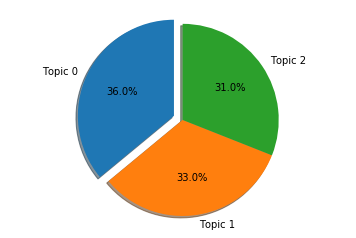

In [75]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Topic 0', 'Topic 1', 'Topic 2'
sizes = [36, 33, 31]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

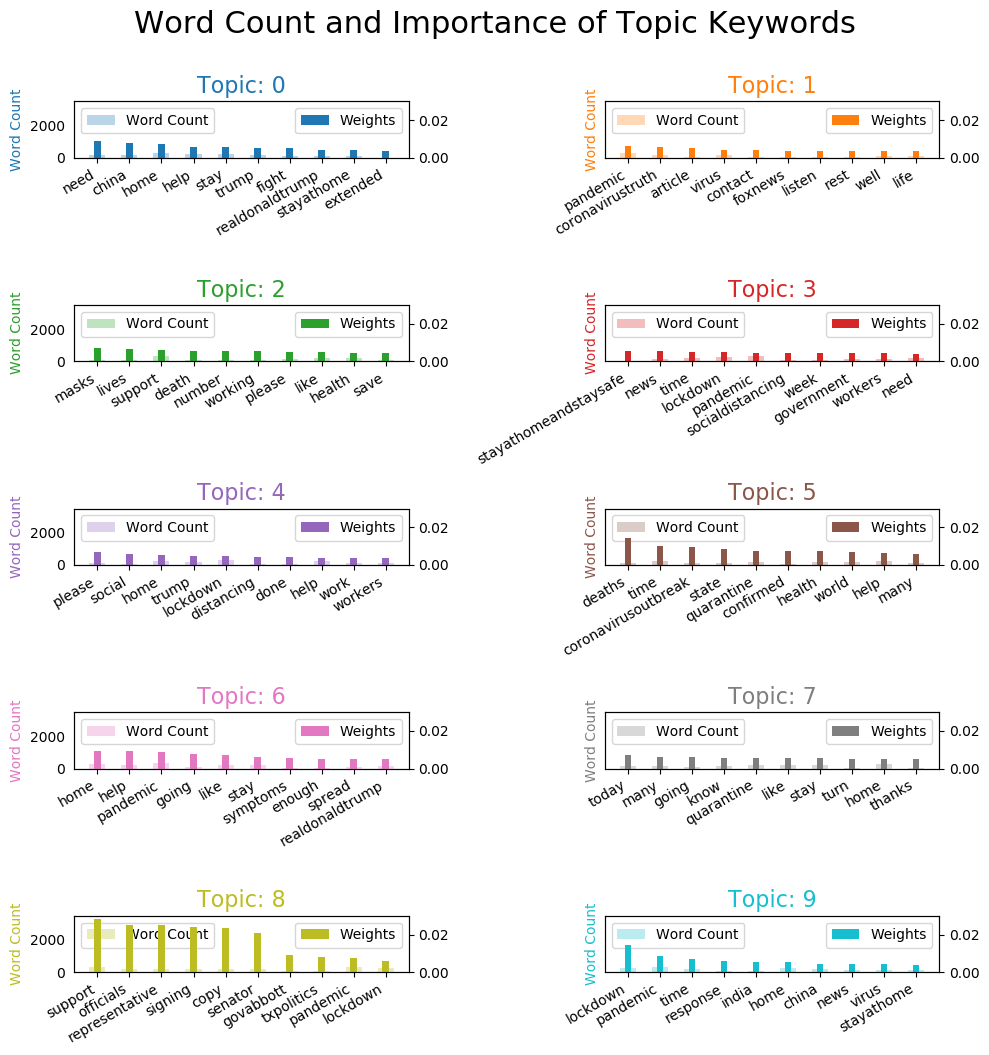

In [62]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in cleaned for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

dataf = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(10,10), sharey=True, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=dataf.loc[dataf.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=dataf.loc[dataf.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dataf.loc[dataf.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()